## In this Notebook the Phase-1 Evaluation of ML-4 Porject has been executed including EDA and Visualizing images 

In [139]:
import os
from pathlib import Path
from tqdm import tqdm
import json
from tensorflow.keras.optimizers import Adam

import numpy as np # linear algebra
import pandas as pd

import math

import cv2
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 10
plt.rcParams['figure.figsize'] = (15, 5)
import seaborn as sns
from PIL import Image

from collections import Counter
from collections import defaultdict

from keras.layers import *
from keras.models import Model
from keras.optimizers import *
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [140]:
DIRin1 = "D:/FSM Dataset/Dataset_2/"
print("DIRin1 =", os.listdir(DIRin1))
DIRtrain = os.path.join(DIRin1,"train_images")
DIRtest = os.path.join(DIRin1,"test_images")


print("Num of Train img\t:",len(os.listdir(DIRtrain)))
print("Num of Test img\t\t:",len(os.listdir(DIRtest)))

DIRin1 = ['sample_submission.csv', 'test_images', 'train.csv', 'train_images']
Num of Train img	: 12568
Num of Test img		: 5506


In [141]:
train_df = pd.read_csv("train.csv")
train_df.head(10)

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
5,0025bde0c.jpg,3,8458 14 8707 35 8963 48 9219 71 9475 88 9731 8...
6,0025bde0c.jpg,4,315139 8 315395 15 315651 16 315906 17 316162 ...
7,002af848d.jpg,4,290800 6 291055 13 291311 15 291566 18 291822 ...
8,002fc4e19.jpg,1,146021 3 146275 10 146529 40 146783 46 147038 ...
9,002fc4e19.jpg,2,145658 7 145901 20 146144 33 146386 47 146629 ...


In [142]:
train_df.tail()

,ImageId,ClassId,EncodedPixels
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...
7094,ffffd67df.jpg,3,30931 43 31103 127 31275 211 31489 253 31745 2...


In [143]:
train_df.shape

(7095, 3)

In [144]:
train_df.isnull().sum()

ImageId          0
ClassId          0
EncodedPixels    0
dtype: int64

### Since there is no NULL/NAN/NA values in the given data set hence no data cleaning is required 

In [145]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ImageId        7095 non-null   object
 1   ClassId        7095 non-null   int64 
 2   EncodedPixels  7095 non-null   object
dtypes: int64(1), object(2)
memory usage: 166.4+ KB


### So, we can conclude that ImageId and EncodedPixel are of string/object type whereas ClassId is of integer type 

### Let's analyse number of labels for each defect type 

In [146]:
defect1 = train_df[train_df['ClassId']==1].EncodedPixels.count()
defect2 = train_df[train_df['ClassId']==2].EncodedPixels.count()
defect3 = train_df[train_df['ClassId']==3].EncodedPixels.count()
defect4 = train_df[train_df['ClassId']==4].EncodedPixels.count()

print('There are {} defect1 images'.format(defect1))
print('There are {} defect2 images'.format(defect2))
print('There are {} defect3 images'.format(defect3))
print('There are {} defect4 images'.format(defect4))

There are 897 defect1 images
There are 247 defect2 images
There are 5150 defect3 images
There are 801 defect4 images


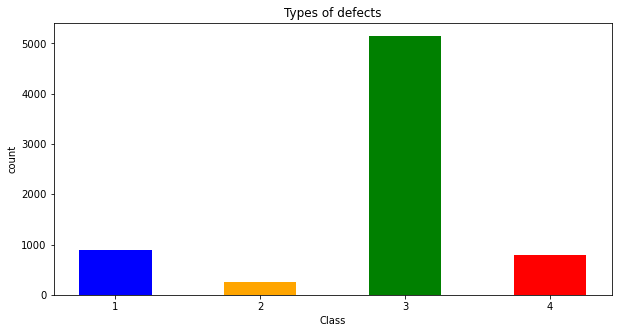

In [147]:
#Plotting bar graph based on the count of each labels
labels = '1','2','3','4'
sizes = [defect1,defect2,defect3,defect4]

fig = plt.figure(figsize=(10,5))

#creating the bar plot
plt.bar(labels,sizes,color=['blue','orange','green','red'],width = 0.5)
plt.xlabel('Class')
plt.ylabel('count')
plt.title('Types of defects')
plt.show()

#### Here we can observe that defect type 3 is more dominant compared to any other defects and defect type 2 is least occuring defects. Hence there is a class imbalance. 

### Now let us check whether the single image has more than one defect simultaneously 

Text(0.5, 1.0, 'Number of Labels per Image')

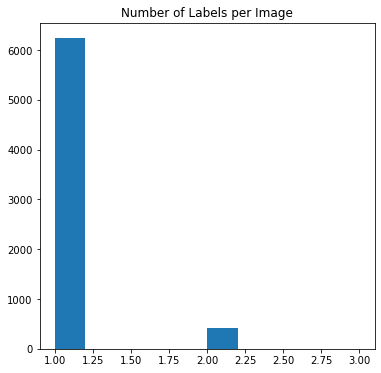

In [148]:
labels_per_image = train_df.groupby('ImageId')['EncodedPixels'].count()
fig,ax = plt.subplots(figsize=(6,6))
ax.hist(labels_per_image)
ax.set_title('Number of Labels per Image')

In [149]:
print('There are {} images with 1 label'.format(labels_per_image[labels_per_image==1].count()))
print('There are {} images with 2 label'.format(labels_per_image[labels_per_image==2].count()))
print('There are {} images with 3 label'.format(labels_per_image[labels_per_image==3].count()))
print('There are {} images with 4 label'.format(labels_per_image[labels_per_image==3].count()))

There are 6239 images with 1 label
There are 425 images with 2 label
There are 2 images with 3 label
There are 2 images with 4 label


## Conclusion: 

1. Most of images with defects contain the defects of only one type
2. In rare cases an image contains the defects of two different types simulataneously

### It would be quiet convenient to Transform class to column 

In [150]:
try:
    train_df['fname'], train_df['cls'] = zip(*train_df['ImageId_ClassId'].str.split('_'))
except:
    train_df['fname'], train_df['cls'] = train_df['ImageId'], train_df['ClassId']
train_df['cls'] = train_df['cls'].astype(int)
train_df = train_df.pivot(index='fname',columns='cls',values='EncodedPixels')
train_df['defects'] = train_df.count(axis=1)
#train_df.reset_index()
train_df.head()

cls,1,2,3,4,defects
fname,,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1
000a4bcdd.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,NaN,NaN,NaN,1
000f6bf48.jpg,NaN,NaN,NaN,131973 1 132228 4 132483 6 132738 8 132993 11 ...,1
0014fce06.jpg,NaN,NaN,229501 11 229741 33 229981 55 230221 77 230468...,NaN,1


In [151]:
# Presence of defects in each images
no_defects_num = np.sum(train_df['defects'] == 0)
defects_num = len(train_df) - no_defects_num
print("no defect imgs \t:", no_defects_num)
print("defects imgs \t:", defects_num)

no defect imgs 	: 0
defects imgs 	: 6666


In [152]:
# Number of defects for each class
class_defects = len(train_df) - train_df.isnull().sum() 
class_defects[:4]

cls
1     897
2     247
3    5150
4     801
dtype: int64

In [153]:
# check images size
train_size = defaultdict(int)
test_size = defaultdict(int)

for fPath in tqdm(Path(DIRtrain).iterdir(), total=len(os.listdir(DIRtrain))):
    img = Image.open(fPath)
    train_size[img.size] += 1
for fPath in tqdm(Path(DIRtest).iterdir(), total=len(os.listdir(DIRtest))):
    img = Image.open(fPath)
    test_size[img.size] += 1
    
print("train_img_size :",train_size)
print("test_img_size  :",test_size)

100%|██████████| 5506/5506 [00:02<00:00, 2737.74it/s]

train_img_size : defaultdict(<class 'int'>, {(1600, 256): 12568})
test_img_size  : defaultdict(<class 'int'>, {(1600, 256): 5506})


Therefore, And all the images is of size 256X1600

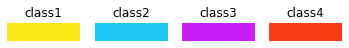

In [154]:
palet = [(250, 230, 20), (30, 200, 241), (200, 30, 250), (250,60,20)]

fig, ax = plt.subplots(1, 4, figsize=(6, 2))
for i in range(4):
    ax[i].axis('off')
    ax[i].imshow(np.ones((10, 40, 3), dtype=np.uint8) * palet[i])
    ax[i].set_title(f"class{i+1}")

plt.show()

For simplicity Class 1 defect is identifies by Yellow Colour, class 2 as Blue, class as purple and class 4 as red

In [155]:
def mask2rgba(mask):
    rgba_list = []
    for idx in range(4):    # idx: class id
        rgba = cv2.cvtColor(mask[:, :, idx], cv2.COLOR_GRAY2RGBA)
        rgba[:, :, :3] = rgba[:, :, :3] /255 * palet[idx]
        rgba_list.append(rgba)
    return rgba_list

In [156]:
def make_mask(row_id):
    fname = train_df.iloc[row_id].name

    labels = train_df.iloc[row_id][:4]
    masks = np.zeros((256, 1600, 4), dtype=np.uint8)    # 4:class 1～4 (ch:0～3)

    for idx, label in enumerate(labels.values):
        if label is not np.nan:
            label = label.split(" ")
            positions = map(int, label[0::2])
            length = map(int, label[1::2])
            mask = np.zeros(256 * 1600, dtype=np.uint8)
            for pos, le in zip(positions, length):
                mask[pos:(pos + le)] = 255
            masks[:, :, idx] = mask.reshape(256, 1600, order='F')
    return fname, masks

In [157]:
def show_mask_image(row_id, contour = True):
    name, mask = make_mask(row_id)
    img = cv2.imread(os.path.join(DIRtrain, name))

    if contour:
        for ch in range(4):
            contours, _ = cv2.findContours(mask[:, :, ch],
                            cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
            for i in range(0, len(contours)):
                cv2.polylines(img, contours[i], True, palet[ch], 2)
    else:
        for ch in range(4):
            img[mask[:,:,ch]==255] = palet[ch]
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.set_title(name)
    ax.imshow(img)
    ax.axis('off')
    plt.show()

In [158]:
# classify defects
idx_class_1 = list(filter(lambda r:not pd.isna(train_df.iloc[r,0]), range(len(train_df))))
idx_class_2 = list(filter(lambda r:not pd.isna(train_df.iloc[r,1]), range(len(train_df))))
idx_class_3 = list(filter(lambda r:not pd.isna(train_df.iloc[r,2]), range(len(train_df))))
idx_class_4 = list(filter(lambda r:not pd.isna(train_df.iloc[r,3]), range(len(train_df))))
# Number of defects class
idx_no_defect = list(filter(lambda r:train_df.iloc[r,4] == 0, range(len(train_df))))
idx_1_defect = list(filter(lambda r:train_df.iloc[r,4] == 1, range(len(train_df))))
idx_class_multi = list(filter(lambda r:train_df.iloc[r,4] >= 2, range(len(train_df))))

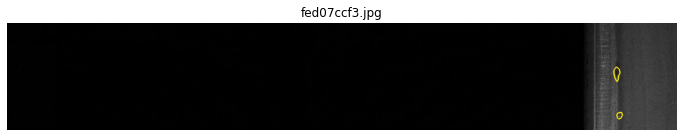

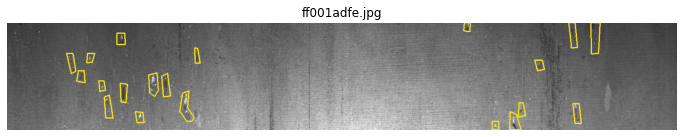

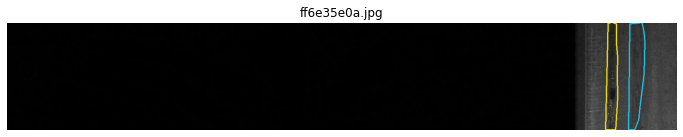

In [159]:
# class_1 defect sample (Yellow)
for idx in idx_class_1[-3:]:
    show_mask_image(idx, contour=True)

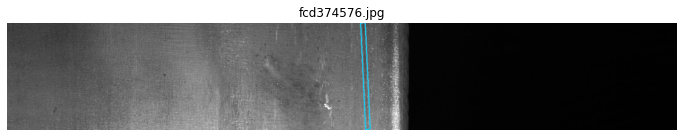

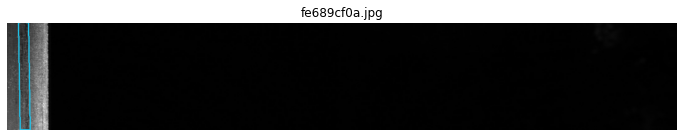

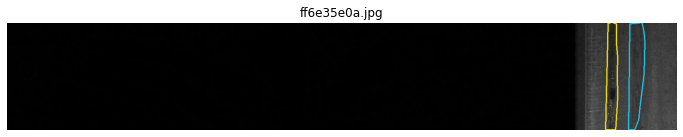

In [160]:
# class_2 defect sample (lightblue)
for idx in idx_class_2[-3:]:
    show_mask_image(idx, contour=True)

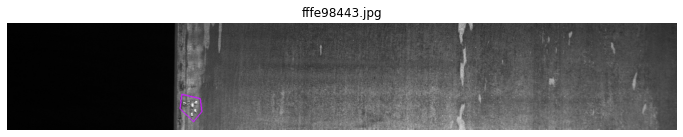

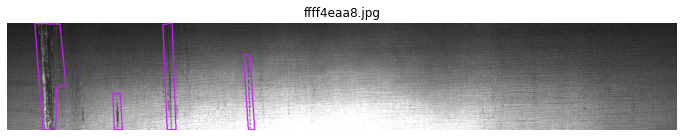

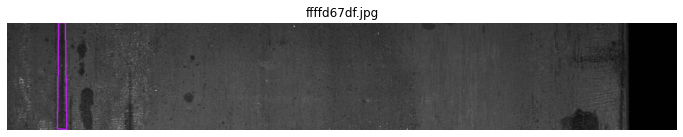

In [161]:
# class_3 defect sample (purple)
for idx in idx_class_3[-3:]:
    show_mask_image(idx, contour=True)

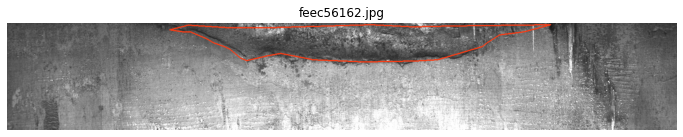

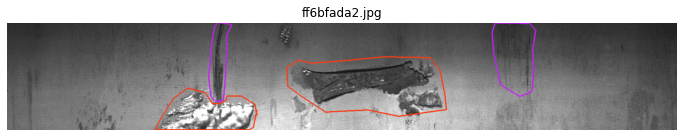

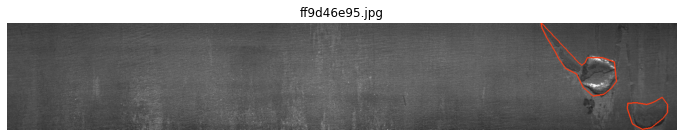

In [162]:
# class_4 defect sample (red)
for idx in idx_class_4[-3:]:
    show_mask_image(idx, contour=True)

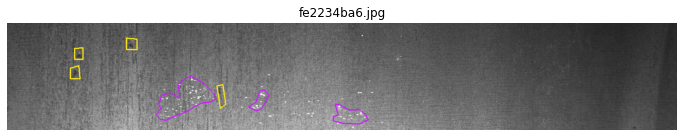

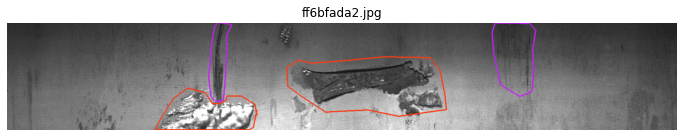

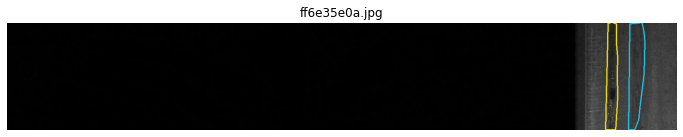

In [163]:
# contain multi class defects
for idx in idx_class_multi[-3:]:
    show_mask_image(idx, contour=True)

In [164]:
input_shape = (256, 1600, 1)
inputs = Input(input_shape)

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (inputs)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (p4)
c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (c5)
p5 = MaxPooling2D(pool_size=(2, 2)) (c5)

c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (p5)
c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (c55)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c55)
u6 = concatenate([u6, c5])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u71 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u71 = concatenate([u71, c4])
c71 = Conv2D(32, (3, 3), activation='relu', padding='same') (u71)
c61 = Conv2D(32, (3, 3), activation='relu', padding='same') (c71)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c61)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(4, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])



model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 1600, 1 0                                            
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 256, 1600, 8) 80          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_47 (Conv2D)              (None, 256, 1600, 8) 584         conv2d_46[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 128, 800, 8)  0           conv2d_47[0][0]                  
____________________________________________________________________________________________

In [165]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) \
            / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [166]:
optimizer = Adam()
model.compile(optimizer, 'binary_crossentropy', metrics=[dice_coef])

In [167]:
# Train Data Generator
def Xy_generator(ids, batch_size):
    Xs = []; ys = []
    while True:
        for i in ids:
            name, mask = make_mask(i)
            img = cv2.imread(os.path.join(DIRtrain, name),
                             cv2.IMREAD_GRAYSCALE)
            img = img[..., np.newaxis]    # Add channel axis
            img = img / 255.           # 0～1
            mask = mask / 255.         # 0～1
            Xs.append(img); ys.append(mask)
            if len(Xs) == batch_size:
                X = np.array(Xs); y = np.array(ys)
                Xs = []; ys = []
                yield [X, y]

X.shape: (4, 256, 1600, 1) 
y.shape: (4, 256, 1600, 4)


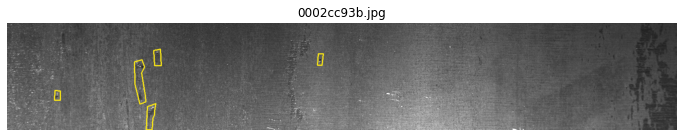

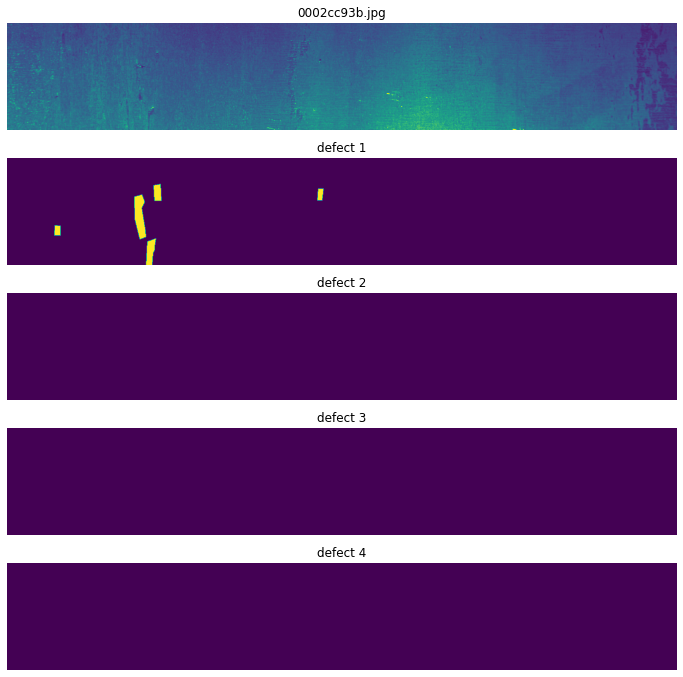

In [168]:
# generator test
for X, y in Xy_generator(range(len(train_df)), 4):
    break

print('X.shape:',X.shape, '\ny.shape:',y.shape)

row = 0
# from train_df
show_mask_image(row, contour=True)
# from generator
fig, axs = plt.subplots(5, figsize=(12,12))
axs[0].imshow(X[row,:,:,0])
axs[0].axis('off')
axs[0].set_title(train_df.iloc[row].name)
for i in range(4):
    axs[i+1].imshow(y[row,:,:,i])
    axs[i+1].set_title(f"defect {i+1}")
    axs[i+1].axis('off')